In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib_venn as pltv
import genopyc as gp


### Following the tutorial mentioned above (which may not be the right one), it is noticeable that the variants obtained from the downloaded file (please add the file to the GitHub) differ from those retrieved by the gp.get_variants_position() function. Why is this? Does the library offer an integrative approach? If so, why aren't these positions considered in the subsequent steps of the notebook?

In [2]:
associations_api = gp.get_associations('EFO_0004994',verbose=True)
rsids_api = associations_api.variantid.tolist()

associations_file =  pd.read_csv('../tutorials/data/EFO_0004994_associations_export.tsv',sep='\t')
rsids_file = [snp.split('-')[0] for snp in associations_file.riskAllele.tolist()]



Querying associations for EFO_0004994...

Building the dataframe...


In [3]:
positions_variants_api = [(tup[1],str(tup[2])) for tup in  gp.get_variants_position(associations_api.variantid.tolist())]

positions_variants_file = [tuple(snp.split(':')) for snp in associations_file.locations.tolist()]

### Overlapping between variantids

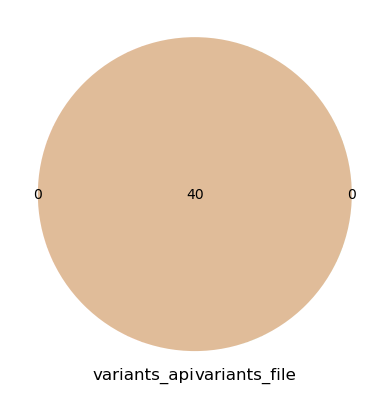

In [4]:
pltv.venn2([set(rsids_api),set(rsids_file)], set_labels = ['variants_api','variants_file'])
plt.show()

### Overlapping between variant positions

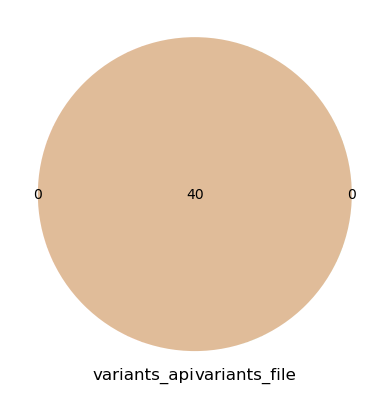

In [5]:
pltv.venn2([set(positions_variants_api),set(positions_variants_file)], set_labels = ['variants_api','variants_file'])
plt.show()